## Practice 20/9/2024 NLP

Import Libraries: 

In [29]:
import spacy
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

Download necessary NLTK

In [30]:
# Download necessary NLTK resources run for one time
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

Load spaCy English model

In [31]:
nlp = spacy.load('en_core_web_sm')

Text input:


In [32]:
doc = nlp("""<p id="original-text">
Welcome to the world of Natural Language Processing (NLP)! 
This paragraph delves into the fascinating realm of text analysis, where we'll unravel the magic behind understanding & manipulating human language. Let's embark on a journey through an NLP pipeline, transforming raw text into structured insights. We'll encounter challenges like contractions (e.g., "can't," "wouldn't"), possessives ("Mary's cat," "the company's profits"), hyphenated words ("state-of-the-art," "well-being"), and even emoticons (:-), 😉). Punctuation marks like commas, semicolons (;), and exclamation points (!) will also play a role. Brace yourselves for a captivating exploration of how machines decipher the intricacies of human communication! 
</p>""")

Step 1: Sentence Segmentation

In [33]:
sentences = [sent.text for sent in doc.sents]
print("Sentence Segmentation:")
for sentence in sentences:
    print(sentence)

step1_len = len(sentences)
print(f"Length of Step 1: {step1_len}")

Sentence Segmentation:
<p id="original-text">
Welcome to the world of Natural Language Processing (NLP)! 

This paragraph delves into the fascinating realm of text analysis, where we'll unravel the magic behind understanding & manipulating human language.
Let's embark on a journey through an NLP pipeline, transforming raw text into structured insights.
We'll encounter challenges like contractions (e.g., "can't," "wouldn't"), possessives ("Mary's cat," "the company's profits"), hyphenated words ("state-of-the-art," "well-being"), and even emoticons (:-), 😉).
Punctuation marks like commas, semicolons (;), and exclamation points (!) will also play a role.
Brace yourselves for a captivating exploration of how machines decipher the intricacies of human communication! 

</p>
Length of Step 1: 7


Step 2: Tokenization

In [34]:
tokens = [tokens.text for tokens in doc]
print(f"Tokenization:")
print(tokens)

step2_len = len(tokens)
print(f"Length of Step 2: {step2_len}")

Tokenization:
['<', 'p', 'id="original', '-', 'text', '"', '>', '\n', 'Welcome', 'to', 'the', 'world', 'of', 'Natural', 'Language', 'Processing', '(', 'NLP', ')', '!', '\n', 'This', 'paragraph', 'delves', 'into', 'the', 'fascinating', 'realm', 'of', 'text', 'analysis', ',', 'where', 'we', "'ll", 'unravel', 'the', 'magic', 'behind', 'understanding', '&', 'manipulating', 'human', 'language', '.', 'Let', "'s", 'embark', 'on', 'a', 'journey', 'through', 'an', 'NLP', 'pipeline', ',', 'transforming', 'raw', 'text', 'into', 'structured', 'insights', '.', 'We', "'ll", 'encounter', 'challenges', 'like', 'contractions', '(', 'e.g.', ',', '"', 'ca', "n't", ',', '"', '"', 'would', "n't", '"', ')', ',', 'possessives', '(', '"', 'Mary', "'s", 'cat', ',', '"', '"', 'the', 'company', "'s", 'profits', '"', ')', ',', 'hyphenated', 'words', '(', '"', 'state', '-', 'of', '-', 'the', '-', 'art', ',', '"', '"', 'well', '-', 'being', '"', ')', ',', 'and', 'even', 'emoticons', '(', ':-)', ',', '😉', ')', '.', 

Step 3: Text Normalization

In [35]:
normalized_tokens = [token.lower() for token in tokens]
print(normalized_tokens)

step3_len = len(normalized_tokens)
print(f"Length of Step 3: {step3_len}")

['<', 'p', 'id="original', '-', 'text', '"', '>', '\n', 'welcome', 'to', 'the', 'world', 'of', 'natural', 'language', 'processing', '(', 'nlp', ')', '!', '\n', 'this', 'paragraph', 'delves', 'into', 'the', 'fascinating', 'realm', 'of', 'text', 'analysis', ',', 'where', 'we', "'ll", 'unravel', 'the', 'magic', 'behind', 'understanding', '&', 'manipulating', 'human', 'language', '.', 'let', "'s", 'embark', 'on', 'a', 'journey', 'through', 'an', 'nlp', 'pipeline', ',', 'transforming', 'raw', 'text', 'into', 'structured', 'insights', '.', 'we', "'ll", 'encounter', 'challenges', 'like', 'contractions', '(', 'e.g.', ',', '"', 'ca', "n't", ',', '"', '"', 'would', "n't", '"', ')', ',', 'possessives', '(', '"', 'mary', "'s", 'cat', ',', '"', '"', 'the', 'company', "'s", 'profits', '"', ')', ',', 'hyphenated', 'words', '(', '"', 'state', '-', 'of', '-', 'the', '-', 'art', ',', '"', '"', 'well', '-', 'being', '"', ')', ',', 'and', 'even', 'emoticons', '(', ':-)', ',', '😉', ')', '.', 'punctuation',

Step 4: Stopword Removal

In [45]:
stop_w = set(stopwords.words('english'))
stopwords_removed = [token for token in normalized_tokens if token not in stop_w]
print(stopwords_removed)

step4_len = len(stopwords_removed)
print(f"Length of Step 4: {step4_len}")



['<', 'p', 'id="original', '-', 'text', '"', '>', '\n', 'welcome', 'world', 'natural', 'language', 'processing', '(', 'nlp', ')', '!', '\n', 'paragraph', 'delves', 'fascinating', 'realm', 'text', 'analysis', ',', "'ll", 'unravel', 'magic', 'behind', 'understanding', '&', 'manipulating', 'human', 'language', '.', 'let', "'s", 'embark', 'journey', 'nlp', 'pipeline', ',', 'transforming', 'raw', 'text', 'structured', 'insights', '.', "'ll", 'encounter', 'challenges', 'like', 'contractions', '(', 'e.g.', ',', '"', 'ca', "n't", ',', '"', '"', 'would', "n't", '"', ')', ',', 'possessives', '(', '"', 'mary', "'s", 'cat', ',', '"', '"', 'company', "'s", 'profits', '"', ')', ',', 'hyphenated', 'words', '(', '"', 'state', '-', '-', '-', 'art', ',', '"', '"', 'well', '-', '"', ')', ',', 'even', 'emoticons', '(', ':-)', ',', '😉', ')', '.', 'punctuation', 'marks', 'like', 'commas', ',', 'semicolons', '(', ';)', ',', 'exclamation', 'points', '(', '!', ')', 'also', 'play', 'role', '.', 'brace', 'captiv

Step 5: Text cleaning

In [42]:
translator = str.maketrans('', '', string.punctuation)
cleaned_tokens = [token.translate(translator) for token in stopwords_removed]
print(cleaned_tokens)

step5_len = len(cleaned_tokens)
print(f"Length of Step 5: {step5_len}")


['', 'p', 'idoriginal', '', 'text', '', '', '\n', 'welcome', 'world', 'natural', 'language', 'processing', '', 'nlp', '', '', '\n', 'paragraph', 'delves', 'fascinating', 'realm', 'text', 'analysis', '', 'll', 'unravel', 'magic', 'behind', 'understanding', '', 'manipulating', 'human', 'language', '', 'let', 's', 'embark', 'journey', 'nlp', 'pipeline', '', 'transforming', 'raw', 'text', 'structured', 'insights', '', 'll', 'encounter', 'challenges', 'like', 'contractions', '', 'eg', '', '', 'ca', 'nt', '', '', '', 'would', 'nt', '', '', '', 'possessives', '', '', 'mary', 's', 'cat', '', '', '', 'company', 's', 'profits', '', '', '', 'hyphenated', 'words', '', '', 'state', '', '', '', 'art', '', '', '', 'well', '', '', '', '', 'even', 'emoticons', '', '', '', '😉', '', '', 'punctuation', 'marks', 'like', 'commas', '', 'semicolons', '', '', '', 'exclamation', 'points', '', '', '', 'also', 'play', 'role', '', 'brace', 'captivating', 'exploration', 'machines', 'decipher', 'intricacies', 'human

Step 6. Stemming and lemmatization

In [48]:
steammer = PorterStemmer()
steammed_tokens = [steammer.stem(token) for token in cleaned_tokens]
print("Stemmed: ")
print(steammed_tokens)



lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]
print("Lemmatized: ")
print(lemmatized_tokens)

stem_len = len(steammed_tokens)
lemma_len = len(lemmatized_tokens)

print(f"Stem Len = {stem_len}, Lemmatize = {lemma_len}")



Stemmed: 
['', 'p', 'idorigin', '', 'text', '', '', '\n', 'welcom', 'world', 'natur', 'languag', 'process', '', 'nlp', '', '', '\n', 'paragraph', 'delv', 'fascin', 'realm', 'text', 'analysi', '', 'll', 'unravel', 'magic', 'behind', 'understand', '', 'manipul', 'human', 'languag', '', 'let', 's', 'embark', 'journey', 'nlp', 'pipelin', '', 'transform', 'raw', 'text', 'structur', 'insight', '', 'll', 'encount', 'challeng', 'like', 'contract', '', 'eg', '', '', 'ca', 'nt', '', '', '', 'would', 'nt', '', '', '', 'possess', '', '', 'mari', 's', 'cat', '', '', '', 'compani', 's', 'profit', '', '', '', 'hyphen', 'word', '', '', 'state', '', '', '', 'art', '', '', '', 'well', '', '', '', '', 'even', 'emoticon', '', '', '', '😉', '', '', 'punctuat', 'mark', 'like', 'comma', '', 'semicolon', '', '', '', 'exclam', 'point', '', '', '', 'also', 'play', 'role', '', 'brace', 'captiv', 'explor', 'machin', 'deciph', 'intricaci', 'human', 'commun', '', '\n', '', 'p', '']
Lemmatized: 
['', 'p', 'idoriginal

Text Length Visualization:

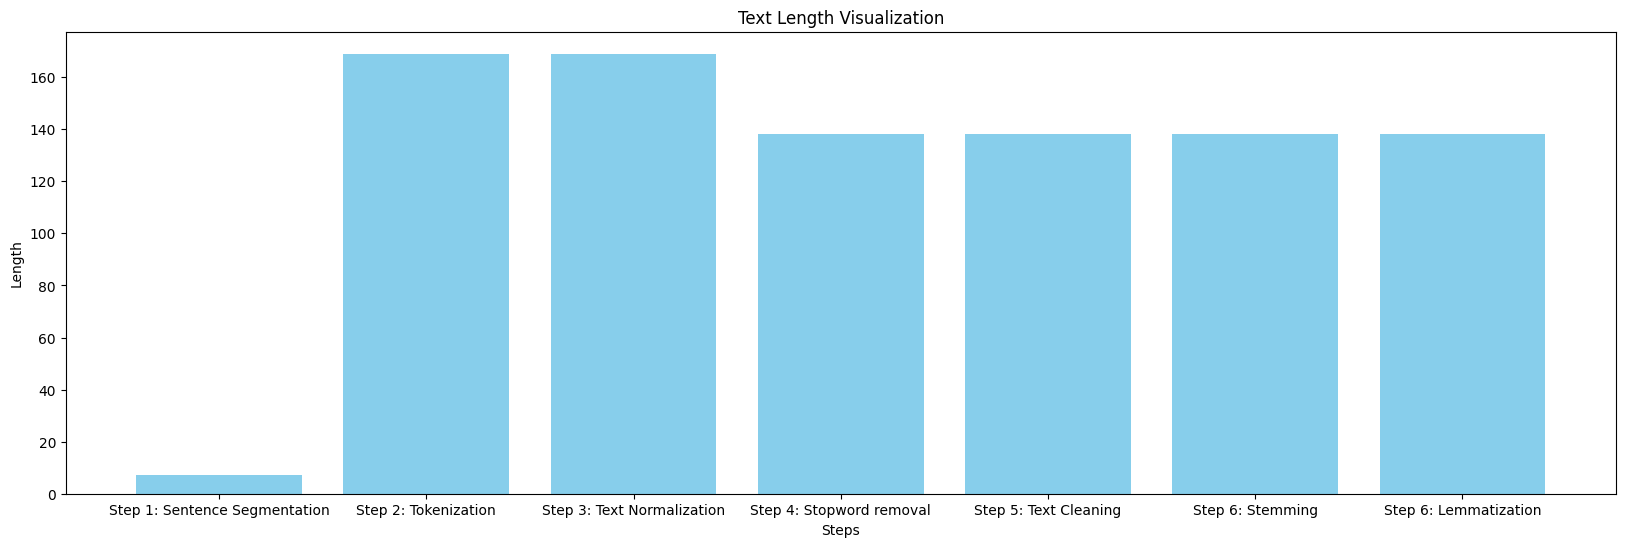

In [56]:
import matplotlib.pyplot as plt

steps = ['Step 1: Sentence Segmentation', 'Step 2: Tokenization', 'Step 3: Text Normalization', 'Step 4: Stopword removal', 'Step 5: Text Cleaning', 'Step 6: Stemming', 'Step 6: Lemmatization']
lengths = [step1_len, step2_len, step3_len, step4_len, step5_len, stem_len, lemma_len]

plt.figure(figsize=(20, 6))
plt.bar(steps, lengths, color='skyblue')
plt.title('Text Length Visualization')
plt.xlabel('Steps')
plt.ylabel('Length')
plt.grid(False)
plt.show()